# Gradient Descent for Housing Price Data

### Random data for house area and price

In [108]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def generate_data():

    random.seed(42)

    y = [random.randint(25,150) for ii in range(100)]
    x = [ii * 4.25 + np.random.normal(scale=40.) for ii in y]

    return y, x


### Function $$ h = b + a*x $$                                                                                      

In [109]:
def h(area, theta):
    return [theta[1] * area[i] + theta[0] for i in range(len(area))]

Random data for price and area (h, x)

In [110]:
area, price = generate_data()

Lets check how our function fits on data, for a = 4.25, b = 5  

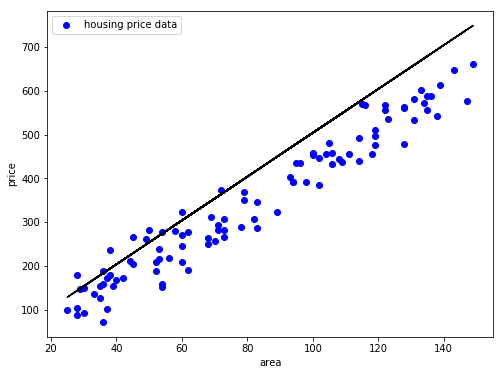

In [111]:
predictions = h(area, [4.25, 5.0])

plt.clf()
plt.figure(figsize=(8,6))
plt.scatter(area, price, color="b", label="housing price data")
plt.plot(area, predictions, color="black")
plt.legend(loc=2)
plt.xlabel("area")
plt.ylabel("price")
plt.show()

### Loss Function 

$$ L = \frac{1}{2m}\sum_{i}^{m} (h_i - y_i)^{2} $$

In [112]:
def Loss(theta, price, area):
    return (1 / (2 * len(area))) * sum([math.pow(h - y, 2) for h, y in zip(h(area, theta), price)])

### Lets plot Loss for a = [0 - 10] range

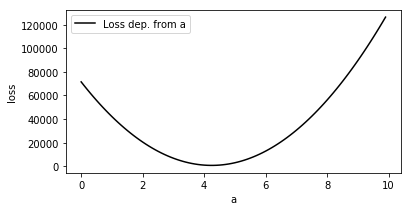

In [113]:
loss_list = [Loss([1, i], price, area) for i in np.arange(0.0, 10.0, 0.1)]

plt.clf()
plt.figure(figsize=(6,3))
plt.plot(np.arange(0.0, 10.0, 0.1), loss_list, color="black", label="Loss dep. from a")
plt.legend(loc=2)
plt.xlabel("a")
plt.ylabel("loss")
plt.show()

### 3D Plot of Loss

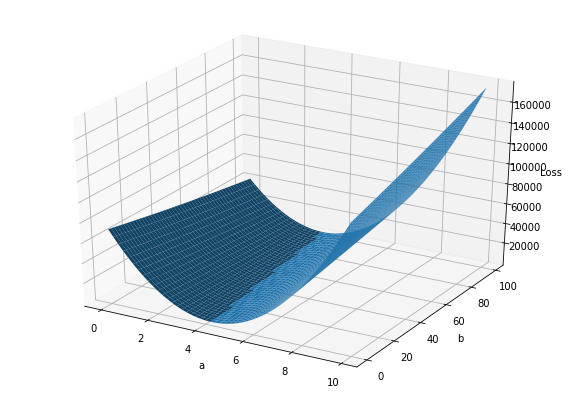

In [114]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0.0, 10.0, 0.1)
y = np.arange(0.0, 100.0, 1)
X, Y = np.meshgrid(x, y)
zs = np.array([Loss([j, i], price, area) for i,j in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Loss')  
plt.show()

### Gradients for a, and b $$ L_a^| = \frac{1}{m}\sum_{i}^{m} (h_i - y_i)*x_i ,\,\,\,\,\,\,\,\,   L_b^| = \frac{1}{m}\sum_{i}^{m} (h_i - y_i) $$

In [115]:
def grad_zero(theta, price, area):
    return (1 / len(area)) * sum([h - y for h, y in zip(h(area, theta), price)])
def grad_one(theta, price, area):
    return (1 / len(area)) * sum([(h - y) * area[i] for h, y, i in zip(h(area, theta), price, range(len(area)))])

### Implementing Gradient Descent

In [116]:
def gradient_descent(th, price, area, a):
    l = Loss(th, price, area)
    list = []

    for i in range(50):
        list.append(l)
        temp0 = th[0] - a * grad_zero(th, price, area)
        temp1 = th[1] - a * grad_one(th, price, area)
        th[0] = temp0
        th[1] = temp1
        
        l = Loss(th, price, area)
    plt.clf()
    plt.figure(figsize=(10,7))
    plt.plot(np.arange(i+1), list, color="red", label="Loss dep. from iterations")
    plt.legend(loc=2)
    plt.xlabel("i")
    plt.ylabel("loss")
    plt.show()
    return th

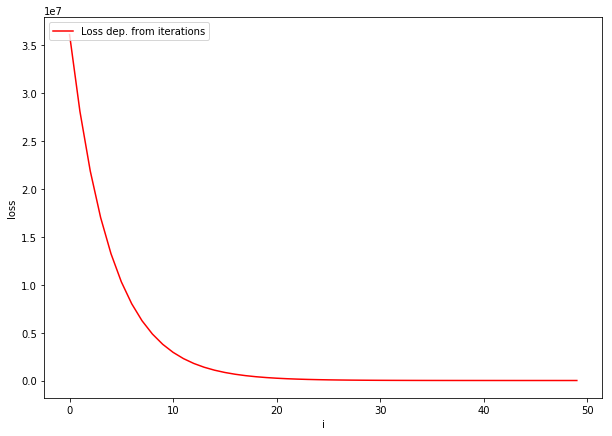

[9.012214582519002, 4.343127753634692]


In [117]:

thetha = gradient_descent([10, 100], price, area, 0.000015)
print(thetha)

### Gradient Descent in action (in one dimension)

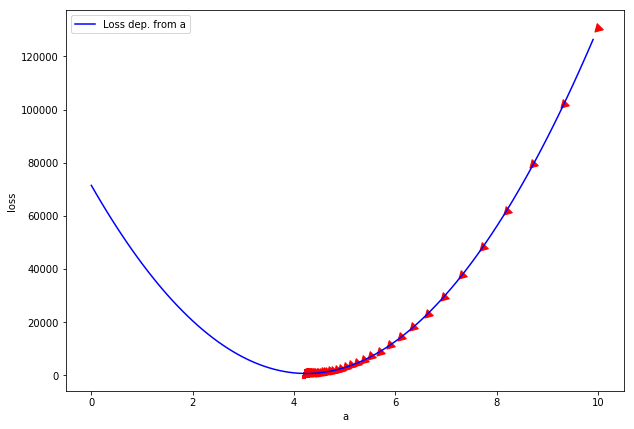

In [118]:
loss_list = [Loss([1, i], price, area) for i in np.arange(0.0, 10.0, 0.1)]
th = [1, 10]
l_list = []
th1_list = []
for i in range(500):
    l = Loss(th, price, area)
    l_list.append(l)
    th1_list.append(th[1])
    temp1 = th[1] - 0.000015 * grad_one(th, price, area)
    th[1] = temp1

plt.clf()
plt.figure(figsize=(10,7))
plt.scatter(th1_list, l_list, marker=(3, 0, 15),  s=100,  color="r" )
plt.plot(np.arange(0.0, 10.0, 0.1), loss_list, color="blue", label="Loss dep. from a")
plt.legend(loc=2)
plt.xlabel("a")
plt.ylabel("loss")
plt.show()